# Flare 2023/06/18

In [1]:
import numpy as np
# import copy
# import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# import sunpy
# from scipy.io import readsav
# import cocopy as cp
# from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
# import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un

E:\solar flares/data/2017-09-06\use_nessi3.py:309: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=model_atlas, theta0=mini['x'], titel="Fitting atlas to nessi ",labelx=" $wavelength [\AA]$",
E:\solar flares/data/2017-09-06\use_nessi3.py:448: SyntaxWarning: invalid escape sequence '\A'
  labelx="wavelength $[\AA]$",
E:\solar flares/data/2017-09-06\use_nessi3.py:1247: SyntaxWarning: invalid escape sequence '\A'
  da.plot_fit(data, model=f_nessi_clv, theta0=mini['x'], titel="fitting Nessi to sst data ",labelx=" $wavelength [\AA]$",
E:\solar flares/data/2017-09-06\use_nessi3.py:1939: SyntaxWarning: invalid escape sequence '\D'
  print(f'The maximal signal to noise ratio for the {criterion} criterion is if the interval is of width $\Delta x={Deltas[i]}\AA$.')
E:\solar flares/data/2017-09-06\use_nessi3.py:1939: SyntaxWarning: invalid escape sequence '\A'
  print(f'The maximal signal to noise ratio for the {criterion} criterion is if the interval is of width $\Delta x={

In [2]:
import os

# Specify the path to the folder you want to list files from
folder_path = "E:\solar flares\data\\2023-06-18\\fits\\nb_6563_2023-06-18T09_37_12_09_37_12=0-15_mixed_corrected_export2023-11-23T09_58_43_im.fits"

maximum = 1000 

def timeframe_to_filename_fits(frame):
    if frame <0 or frame > maximum:
        raise IndexError(f'frame number {frame} is not in [0, {max}).')
    else:
        return folder_path
ttff = timeframe_to_filename_fits



<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_22580\615185798.py:4: SyntaxWarning: invalid escape sequence '\s'
  folder_path = "E:\solar flares\data\\2023-06-18\\fits\\nb_6563_2023-06-18T09_37_12_09_37_12=0-15_mixed_corrected_export2023-11-23T09_58_43_im.fits"


In [3]:
head0 = f.getheader(ttff(0))
maximum = head0['NAXIS5']
head0

SIMPLE  =                    T / Written by IDL:  Mon Jul 24 12:09:16 2023      
BITPIX  =                  -32 /                                                
NAXIS   =                    5 / Number of data axes                            
NAXIS1  =                 2721 / Number of positions along axis 1               
NAXIS2  =                 2720 / Number of positions along axis 2               
NAXIS3  =                   33 / Number of positions along axis 3               
NAXIS4  =                    1 / Number of positions along axis 4               
NAXIS5  =                   16 / Number of positions along axis 5               
EXTEND  =                    T / The file has extension(s).                     
PC1_1   =              1.00000 / No rotations                                   
PC2_2   =              1.00000 / No rotations                                   
PC3_3   =              1.00000 / No rotations                                   
PC4_4   =              1.000

In [4]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    print(len(io))
    for i, hdl in enumerate(io):
        print(f'\n next hdl number {i} : {hdl}')
        print(np.shape(hdl.data))
        print(hdl.data[0][0])
    tlist2 = io[6].data
    pos = io[1].data

# shape data: [(58, 1, 33, 2773, 2783)-data,  positons , array SIM_XY????, date and time frames,  
# (58, 1, 1, 2773, 2783)-data, terug date+time frames, nog eens date+time frames, en nog eens, array orde e10,  
# frame umbers , ....     errors?,  errors?]


wvl = pos[0][0][:,:,0,0,2][0]*10
np.save('line_data/wav_sstHa.npy', wvl)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001E8E1AB73E0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E8E1AB4F20>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E8E1AB56D0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E8E1AB5E20>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E8E1AB6570>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001E8E1AB6EA0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E8E1AE9640>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E8E1AE9D90>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E8E1AEA4E0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E8E1AEAC30>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E8E1AEB380>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E8E1AEBEF0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E8E1AF4860>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001E8E1AF5190>, <astropy.io.fits.hdu.ta

In [5]:
pos[0][0][:,:,0,0,2][0]

array([656.03181166, 656.05681166, 656.08181166, 656.10681166,
       656.13181166, 656.15681166, 656.18181166, 656.19181166,
       656.20181166, 656.21181166, 656.22181166, 656.23181166,
       656.24181166, 656.25181166, 656.26181166, 656.27181166,
       656.28181166, 656.29181166, 656.30181166, 656.31181166,
       656.32181166, 656.33181166, 656.34181166, 656.35181166,
       656.36181166, 656.37181166, 656.38181166, 656.40681166,
       656.43181166, 656.45681166, 656.48181166, 656.50681166,
       656.53181166], dtype='>f8')

In [6]:
tlist = np.array(tlist2[0])
tlist3 = tlist[0,:,0,0,0, 0]
tlist3

array(['2023-06-18T09:37:34.37442', '2023-06-18T09:38:27.81945',
       '2023-06-18T09:39:21.50748', '2023-06-18T09:40:15.25410',
       '2023-06-18T09:41:08.76497', '2023-06-18T09:42:02.27927',
       '2023-06-18T09:42:56.05581', '2023-06-18T09:43:49.86803',
       '2023-06-18T09:44:43.48648', '2023-06-18T09:45:36.93047',
       '2023-06-18T09:46:30.66216', '2023-06-18T09:47:24.35351',
       '2023-06-18T09:48:17.99033', '2023-06-18T09:49:11.45509',
       '2023-06-18T09:50:05.15974', '2023-06-18T09:50:58.99334'],
      dtype='<U25')

In [7]:
time_list = [t[11:] for t in tlist3]
time_list

['09:37:34.37442',
 '09:38:27.81945',
 '09:39:21.50748',
 '09:40:15.25410',
 '09:41:08.76497',
 '09:42:02.27927',
 '09:42:56.05581',
 '09:43:49.86803',
 '09:44:43.48648',
 '09:45:36.93047',
 '09:46:30.66216',
 '09:47:24.35351',
 '09:48:17.99033',
 '09:49:11.45509',
 '09:50:05.15974',
 '09:50:58.99334']

In [8]:
def datacube(timeframe):
    if timeframe < maximum and timeframe >= 0:
        return f.getdata(ttff(timeframe))[timeframe][0][:, 350:2400, 350:2400]
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {maximum}."
        )

In [9]:
print(np.any(np.isnan(datacube(0)[0,:,:])), np.shape(datacube(0)))
print(f"the maximum attained value in frame 0 is {np.max(datacube(0))} and the 98 percile is {np.percentile(datacube(0), 98)}")
datacube(0)[::3, ::100, ::100]

True (33, 2050, 2050)
the maximum attained value in frame 0 is nan and the 98 percile is nan


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

E:\solar flares\data\2023-06-18\fits\nb_6563_2023-06-18T09_37_12_09_37_12=0-15_mixed_corrected_export2023-11-23T09_58_43_im.fits
s=(33, 2050, 2050)
the shape of the data is (16, '??', 33, 2050, 2050)
the wavelengths are self._wavel = array([6560.31811657, 6560.56811657, 6560.81811657, 6561.06811657,
       6561.31811657, 6561.56811657, 6561.81811657, 6561.91811657,
       6562.01811657, 6562.11811657, 6562.21811657, 6562.31811657,
       6562.41811657, 6562.51811657, 6562.61811657, 6562.71811657,
       6562.81811657, 6562.91811657, 6563.01811657, 6563.11811657,
       6563.21811657, 6563.31811657, 6563.41811657, 6563.51811657,
       6563.61811657, 6563.71811657, 6563.81811657, 6564.06811657,
       6564.31811657, 6564.56811657, 6564.81811657, 6565.06811657,
       6565.31811657])
Boundary
Blue=Outside, yellow=Inside


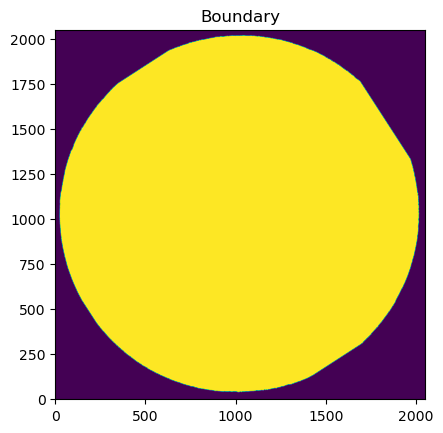

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
reload(un)

Ha = un.SST_data_from_multiple_fits_files(
    timeframe_to_filename_fits,
    spectfilename='line_data/wav_sstHa.npy', 
    number_of_frames=maximum,
    time=time_list, 
    name_of_line='Ha23a', 
    thresh=[0, np.percentile(datacube(0), 99.5)], 
    boundary_methode='search', 
    boundary_arguments = {"error":0.01}, 
    with_stokes=True, 
    with_time=True, 
    alternative_datacube=datacube
    )

Ha.boundary


In [11]:
secs = un.get_TIME(Ha)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{Ha.shape=}')

the mean cadence is 53.59999999999991 seconds for this line!
Ha.shape=(16, '??', 33, 2050, 2050)


[[1.0, 1.125], [4.0, 1.125], [7.0, 1.125]]
The guessed filters are [[5.0, 4.125], [16.0, 4.125], [27.0, 4.125]]


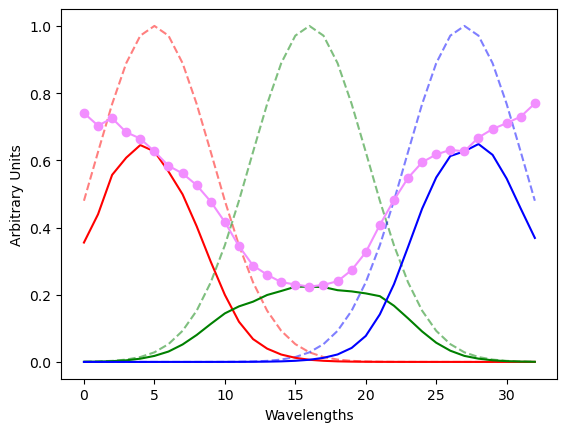

In [12]:
# %matplotlib inline
gf = un.guess_filters(9)
print(gf)
Ha.update_filters(None)# [[3,2], [7,2], [11,2]]
Ha.plot_filt(880,900)
plt.show()

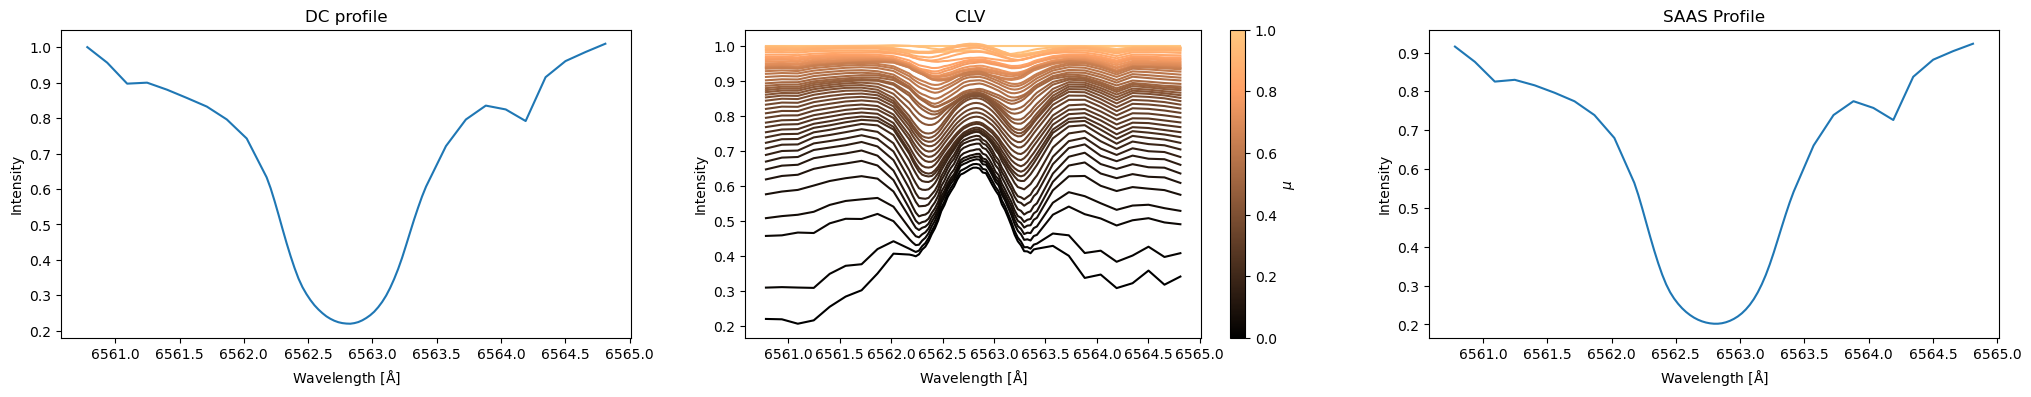

6562.797056366136 6562.797056366135


In [13]:
reload(un)
theor_Ha = un.linestudier('E:/solar flares/data/2017-09-06/fits/6563_clv.fits', atlas=None, nr=101)
print(np.median(theor_Ha.sst_wav), np.mean(theor_Ha.sst_wav))

## Calculating the $\mu$ !!!!! 


In [14]:
Ha.shape

(16, '??', 33, 2050, 2050)

In [15]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(Ha.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        print(add_enters(str(hdu.header), length_row=79))
        try: 
            x= hdu.header['CRVAL1A']
            y = hdu.header['CRVAL2A']
            print("x =", x, "y=", y)
            pix_x= hdu.header['CRPIX1A']
            pix_y = hdu.header['CRPIX2A']
            print("middel pixel x =", pix_x, "middel pixel y =", pix_y)
        except KeyError:
            # raise(KeyError)
            pass

x= -598.761391414
y = -353.460135090 
pix_x=  1392.00 
pix_y = 1387.00 

SIMPLE  =                    T / Written by IDL:  Mon Jul 24 12:09:16 2023     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 2721 / Number of positions along axis 1              
 NAXIS2  =                 2720 / Number of positions along axis 2              
 NAXIS3  =                   33 / Number of positions along axis 3              
 NAXIS4  =                    1 / Number of positions along axis 4              
 NAXIS5  =                   16 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 PC1_1   =              1.00000 / No rotations                                  
 PC2_2   =              1.00000 / No rotations                                  
 PC3_3   =              1.00000 / No rotations                                  
 PC4_4   =              1.000

In [16]:
# WCSNAMEA= 'AVERAGED APPROXIMATE HPLN-TAN/HPLT-TAN CENTER POINT' /               
# CRPIX1A =              1392.00 / Center pixel of image array                    
# CRPIX2A =              1387.00 / Center pixel of image array                    
# CRVAL1A =       -598.761391414 / [arcsec] Coordinates of center of image array  
# CRVAL2A =       -353.460135090 / [arcsec] Coordinates of center of image array  
# CDELT1A =              0.00000 / Zero FOV extent                                
# CDELT2A =              0.00000 / Zero FOV extent                                
# SPECSYS = 'TOPOCENT'           / Coordinate reference frame = observer          

In [17]:
xy = pos[0][0][:,:,:,:, :2]
# seems to be centers per frame but different from those in the header???
xy, np.shape(xy), xy[0,0]

(array([[[[[-467.8550219 , -449.19449624],
           [-348.1750219 , -449.19449624]],
 
          [[-467.8550219 , -329.55849624],
           [-348.1750219 , -329.55849624]]],
 
 
         [[[-467.8550219 , -449.19449624],
           [-348.1750219 , -449.19449624]],
 
          [[-467.8550219 , -329.55849624],
           [-348.1750219 , -329.55849624]]],
 
 
         [[[-467.8550219 , -449.19449624],
           [-348.1750219 , -449.19449624]],
 
          [[-467.8550219 , -329.55849624],
           [-348.1750219 , -329.55849624]]],
 
 
         ...,
 
 
         [[[-467.8550219 , -449.19449624],
           [-348.1750219 , -449.19449624]],
 
          [[-467.8550219 , -329.55849624],
           [-348.1750219 , -329.55849624]]],
 
 
         [[[-467.8550219 , -449.19449624],
           [-348.1750219 , -449.19449624]],
 
          [[-467.8550219 , -329.55849624],
           [-348.1750219 , -329.55849624]]],
 
 
         [[[-467.8550219 , -449.19449624],
           [-348.1750219 , -449.19

[-467.08032736 -347.40032736 -449.87446657 -330.23846657]
does MU contain nan's? False
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.8074569937474495 for timeframe 10
Coundourplot succesfully saved.


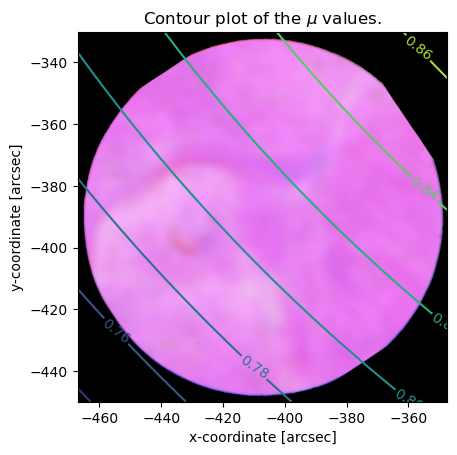

In [18]:
def calculate_mu(x,y, radius=959.63):
    # sourcery skip: inline-immediately-returned-variable
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu


fxp = np.array(xy[maximum//2,0,0,:,0])
fyp = np.array(xy[maximum//2,0,:,0,1])
fxp = np.concatenate((fxp, fyp))
print(fxp)

x = np.linspace(fxp[0], fxp[1], Ha.shape[4])
y = np.linspace(fyp[0], fyp[1], Ha.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]




def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.ccp_frame(timeFrame,False)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        B = over.boundary
        B = np.where(B == 1, 1, np.nan)
        K = MU * B
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 
mu = give_mu_contourplot(MU, xx, yy, fxp, over=Ha, save=True, save_name=Ha.name_of_line, timeFrame=10)
sst_data = Ha
theor_line = theor_Ha
set_mu(Ha, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_Ha.index_mu], theor_line.sst_clv[theor_Ha.index_mu][0], clv_fit(mu, theor_line)


(205, 205) (205, 205) (204, 204)


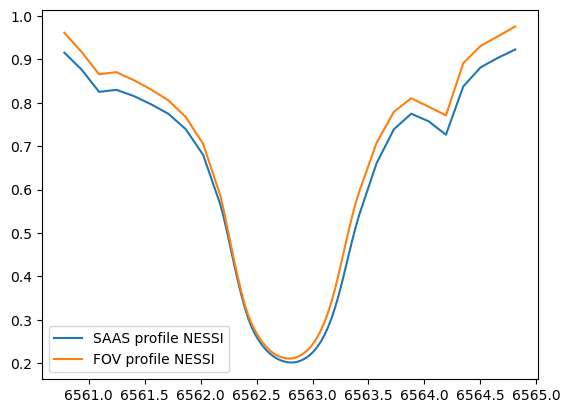

In [19]:
theor_Ha.set_fov( xx, yy, Ha.boundary, sr=959.63, reduction=10)



## Finding a suitable quiet sun patch

<>:41: SyntaxWarning: invalid escape sequence '\C'
<>:41: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_22580\3897370262.py:41: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_Ha.png')


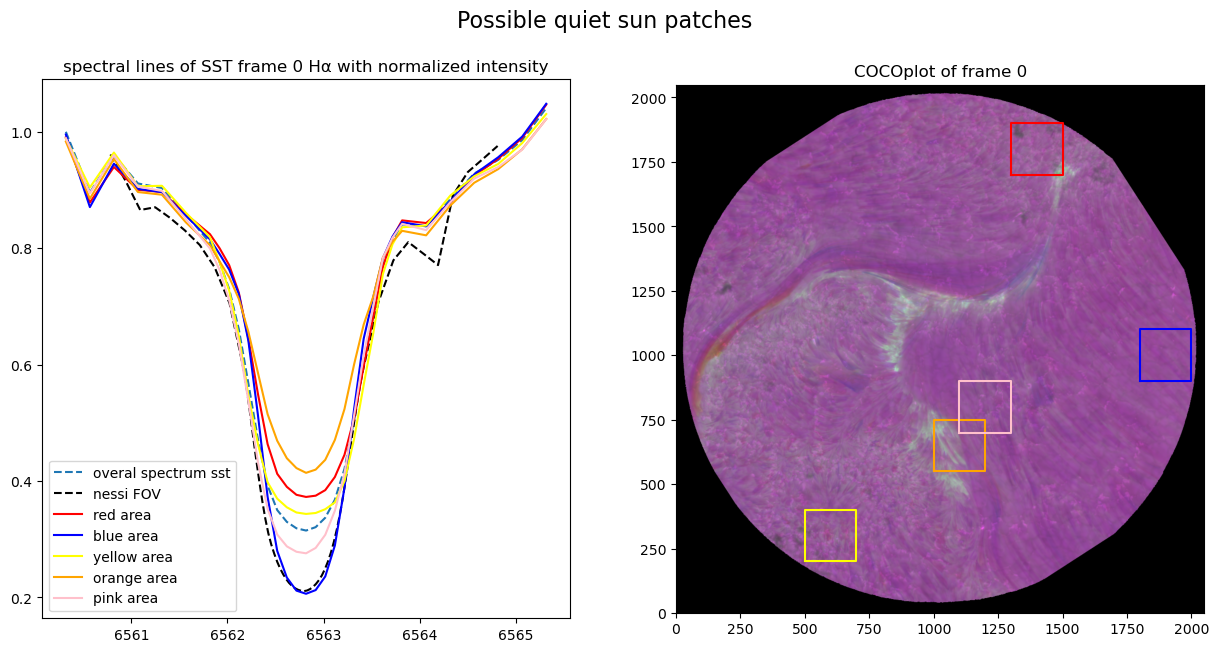

In [21]:
frame=0

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

Ha.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(1300,1500),(1700,1900)], [(1800,2000), (900, 1100)], [(500, 700), (200, 400)], [(1000,1200),(550,750)], [(1100,1300),(700, 900)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
Ha.frame_integrated_spect(frame)
ax[0].plot(Ha._wavel, Ha.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_Ha.sst_wav + theta[0], theta[2] * theor_Ha.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]


ax[0].plot(theor_Ha.sst_wav + theta[0], theta[2] * theor_Ha.spectr_fov, '--', label='nessi FOV', color='black')

ax[1].imshow(Ha.current_ccp,origin='lower', extent=(0, Ha.shape[3], 0, Ha.shape[4]))
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(Ha._wavel, Ha.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_Ha.png')
plt.show()


### The quiet sun patch

fill in here which color the wanted quiet sun patch had 

In [22]:
color_wanted_patch = 'blue'

the edges of the patch are denoted by the xlim: (1800, 2000) and ylim: (900, 1100)


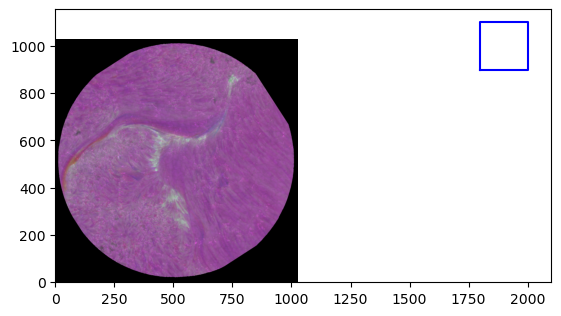

{'frame': 0, 'xlim': (1800, 2000), 'ylim': (900, 1100), 'color': 'blue'}

In [23]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

Ha.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
Ha.quiet_sun

The quiet sun is pick at x (-356.1324698640361, -391.5161542180819) with average              mu 0.8341589125619433


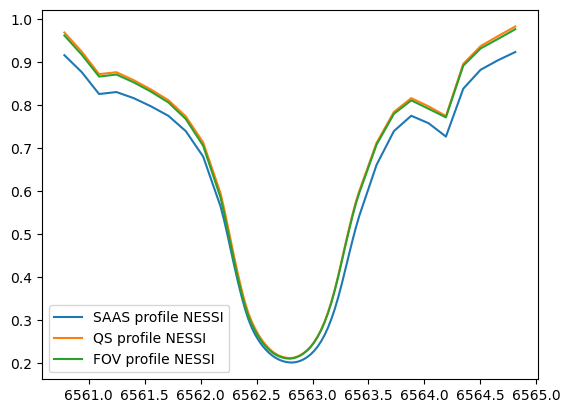

In [24]:
theor_Ha.set_quiet_sun(xlim=xlim, ylim=ylim)


[6560.31811657 6560.56811657 6560.81811657 6561.06811657 6561.31811657
 6561.56811657 6561.81811657 6561.91811657 6562.01811657 6562.11811657
 6562.21811657 6562.31811657 6562.41811657 6562.51811657 6562.61811657
 6562.71811657 6562.81811657 6562.91811657 6563.01811657 6563.11811657
 6563.21811657 6563.31811657 6563.41811657 6563.51811657 6563.61811657
 6563.71811657 6563.81811657 6564.06811657 6564.31811657 6564.56811657
 6564.81811657 6565.06811657 6565.31811657] [0.9953928  0.8705954  0.94524044 0.90186435 0.89626461 0.85563666
 0.81515855 0.78997684 0.76318014 0.72142136 0.64051843 0.51224142
 0.37252203 0.27980557 0.23403543 0.2115632  0.20616588 0.21250951
 0.23595081 0.28921884 0.38845164 0.52339655 0.64460415 0.71598625
 0.78298336 0.81999874 0.84461838 0.83769763 0.87997431 0.92680526
 0.95622432 0.99174213 1.04814458] [1.10101071 1.02930748 0.95760426 0.87927884 0.86725915 0.83363222
 0.78498588 0.75321113 0.71428909 0.64002813 0.54865579 0.42494877
 0.32332259 0.26565294 0.2

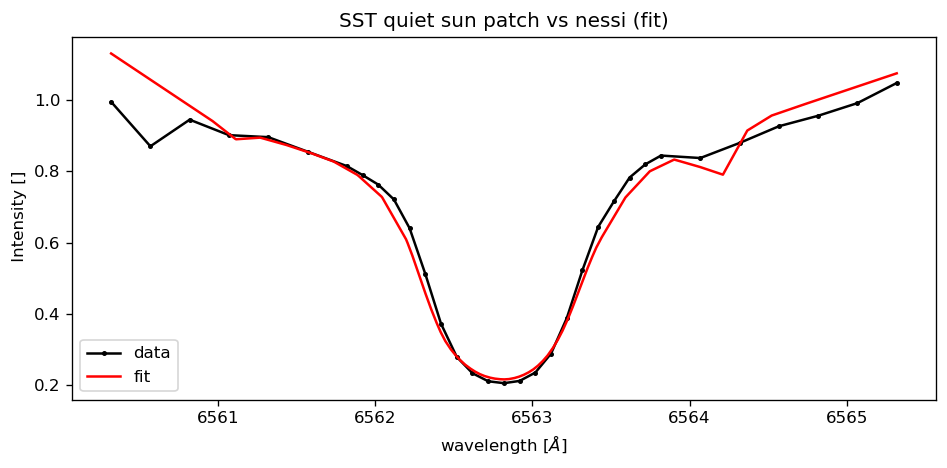

de p-waarde is  0.0034988026274979443 
Chi^2 reduced= 56.4016441722466 
aantal vrijheidgraden= 31 
chi^2= 1748.4509693396446
we behouden de fit tot op een betrouwbaarheidsniveau van  0.0034988026274979443 
Oftewel verwerp als p-waarde <lpha-niveau 


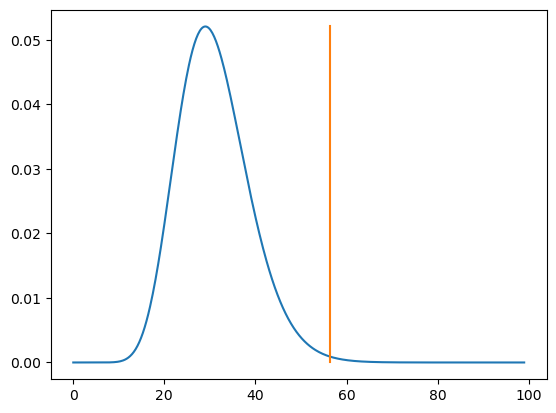

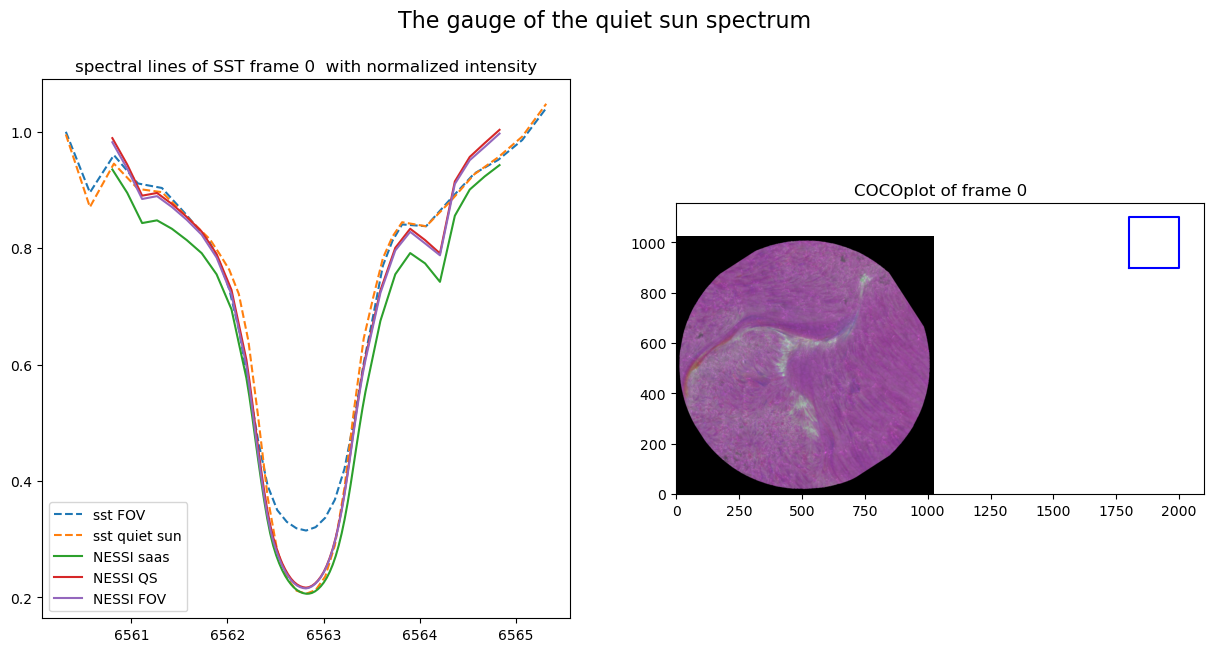

In [25]:
reload(un)
un.fit_qs_to_NESSI(theor_Ha, Ha)

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

## The full FOV integrated spectrum over time:

In [26]:
sst_data = Ha
Ha.shape

(16, '??', 33, 2050, 2050)

In [27]:
Ha.calculate__FOV_spect_over_time()

In [28]:
sst_data.quiet_sun

{'frame': 0, 'xlim': (1800, 2000), 'ylim': (900, 1100), 'color': 'blue'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [0] at time ['t=09:37:34 UT'].
The SST data runs from t=09:37:34 UT to t=09:50:58 UT.
The areafactor for THIS flare is 0.0036197736246519 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 290.9%.


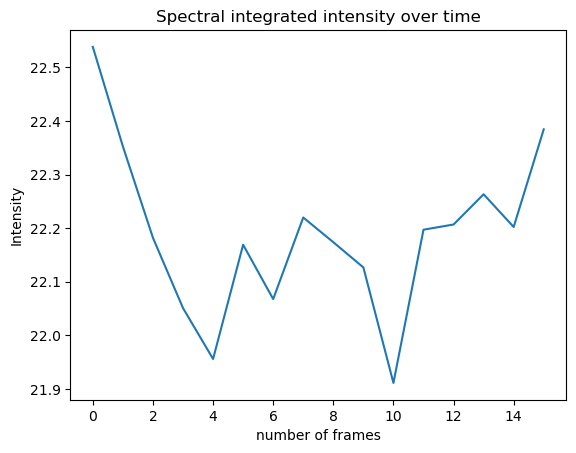

In [29]:
reload(un)
un.save_for_further_analysis(Ha, theor_Ha)


# Movie Making

[0.019913628923508286, 0, 1.0218602225535718]
Frame: 0, 09:37:34.37442, total number of frames: 16 


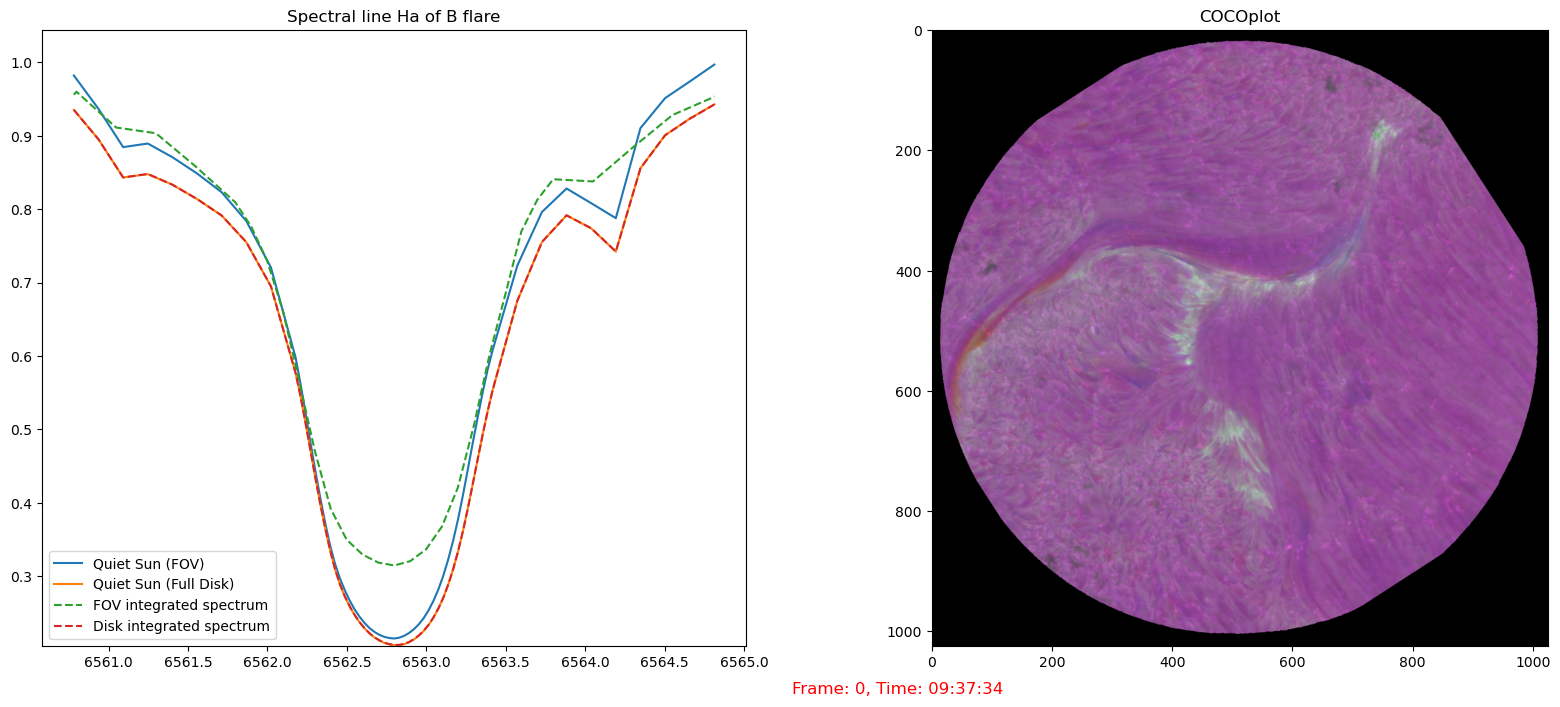

In [30]:
# fill in here all arguments
theor_line = theor_line
sst_data = Ha
name_of_flare = "B"
name_of_line = "Ha"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step=2, show_boundary=False)